In [1]:
import numpy as np
import pandas as pd
import datetime


In [2]:
import json
import requests
ferrara = json.loads(requests.get('https://api.openweathermap.org/data/2.5/weather?q=Ferrara,IT&appid=5807ad2a45eb6bf4e81d137dafe74e15').text)


In [3]:
ferrara

{'coord': {'lon': 11.8333, 'lat': 44.8},
 'weather': [{'id': 804,
   'main': 'Clouds',
   'description': 'overcast clouds',
   'icon': '04d'}],
 'base': 'stations',
 'main': {'temp': 292.51,
  'feels_like': 292.22,
  'temp_min': 292.04,
  'temp_max': 293.74,
  'pressure': 1017,
  'humidity': 66,
  'sea_level': 1017,
  'grnd_level': 1017},
 'visibility': 10000,
 'wind': {'speed': 2.68, 'deg': 50, 'gust': 7.76},
 'clouds': {'all': 100},
 'dt': 1685511558,
 'sys': {'type': 2,
  'id': 2007888,
  'country': 'IT',
  'sunrise': 1685503859,
  'sunset': 1685558996},
 'timezone': 7200,
 'id': 3177088,
 'name': 'Provincia di Ferrara',
 'cod': 200}

In [4]:
list(ferrara.keys())

['coord',
 'weather',
 'base',
 'main',
 'visibility',
 'wind',
 'clouds',
 'dt',
 'sys',
 'timezone',
 'id',
 'name',
 'cod']

In [5]:
print('Coordinates = ', ferrara['coord'])
print('Weather = ', ferrara['weather'])
print('base = ', ferrara['base'])
print('main = ', ferrara['main'])
print('visibility = ', ferrara['visibility'])
print('wind = ', ferrara['wind'])
print('clouds = ', ferrara['clouds'])
print('dt = ', ferrara['dt'])
print('sys = ', ferrara['sys'])
print('id = ', ferrara['id'])
print('name = ', ferrara['name'])
print('cod = ', ferrara['cod'])


Coordinates =  {'lon': 11.8333, 'lat': 44.8}
Weather =  [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}]
base =  stations
main =  {'temp': 292.51, 'feels_like': 292.22, 'temp_min': 292.04, 'temp_max': 293.74, 'pressure': 1017, 'humidity': 66, 'sea_level': 1017, 'grnd_level': 1017}
visibility =  10000
wind =  {'speed': 2.68, 'deg': 50, 'gust': 7.76}
clouds =  {'all': 100}
dt =  1685511558
sys =  {'type': 2, 'id': 2007888, 'country': 'IT', 'sunrise': 1685503859, 'sunset': 1685558996}
id =  3177088
name =  Provincia di Ferrara
cod =  200


In [6]:
ferrara['main']['temp']

292.51

In [7]:
def prepare(city,city_name):
    temp = [ ]
    humidity = [ ]
    pressure = [ ]
    description = [ ]
    dt = [ ]
    wind_speed = [ ]
    wind_deg = [ ]
    temp.append(city['main']['temp']-273.15)
    humidity.append(city['main']['humidity'])
    pressure.append(city['main']['pressure'])
    description.append(city['weather'][0]['description'])
    dt.append(city['dt'])
    wind_speed.append(city['wind']['speed'])
    wind_deg.append(city['wind']['deg'])
    headings = ['temp','humidity','pressure','description','dt','wind_speed','wind_deg']
    data = [temp,humidity,pressure,description,dt,wind_speed,wind_deg]
    df = pd.DataFrame(data,index=headings)
    city = df.T
    city['city'] = city_name
    city['day'] = city['dt'].apply(datetime.datetime.fromtimestamp)
    return city


In [8]:
t1 = prepare(ferrara,'ferrara')
t1


,temp,humidity,pressure,description,dt,wind_speed,wind_deg,city,day
0,19.36,66,1017,overcast clouds,1685511558,2.68,50,ferrara,2023-05-31 07:39:18


In [12]:
df_ferrara = t1
t2 = prepare(ferrara,'ferrara')
df_ferrara = pd.concat([df_ferrara, t2])
df_ferrara


,temp,humidity,pressure,description,dt,wind_speed,wind_deg,city,day
0,19.36,66,1017,overcast clouds,1685511558,2.68,50,ferrara,2023-05-31 07:39:18
0,19.36,66,1017,overcast clouds,1685511558,2.68,50,ferrara,2023-05-31 07:39:18


In [14]:
df_ferrara['dist'] = 47



In [16]:
df_ferrara=pd.read_csv('ferrara_270615.csv')
df_milano=pd.read_csv('milano_270615.csv')
df_mantova=pd.read_csv('mantova_270615.csv')
df_ravenna=pd.read_csv('ravenna_270615.csv')
df_torino=pd.read_csv('torino_270615.csv')
df_asti=pd.read_csv('asti_270615.csv')
df_bologna=pd.read_csv('bologna_270615.csv')
df_piacenza=pd.read_csv('piacenza_270615.csv')
df_cesena=pd.read_csv('cesena_270615.csv')
df_faenza=pd.read_csv('faenza_270615.csv')


In [17]:
df_cesena

,Unnamed: 0,temp,humidity,pressure,description,dt,wind_speed,wind_deg,city,day,dist
0,0,23.34,82,1017,very heavy rain,1435387623,1.91,175.511,Cesena,2015-06-27 08:47:03,14
1,1,24.95,69,1018,very heavy rain,1435390801,2.01,159.500,Cesena,2015-06-27 09:40:01,14
2,2,25.67,73,1017,very heavy rain,1435394204,2.10,100.000,Cesena,2015-06-27 10:36:44,14
3,3,26.17,69,1017,very heavy rain,1435398652,3.10,120.000,Cesena,2015-06-27 11:50:52,14
4,4,27.07,61,1016,very heavy rain,1435402083,3.10,110.000,Cesena,2015-06-27 12:48:03,14
5,5,27.41,69,1016,very heavy rain,1435405721,3.60,110.000,Cesena,2015-06-27 13:48:41,14
6,6,27.38,65,1015,very heavy rain,1435409381,5.70,110.000,Cesena,2015-06-27 14:49:41,14
7,7,26.59,65,1014,very heavy rain,1435416585,5.10,110.000,Cesena,2015-06-27 16:49:45,14
8,8,27.16,65,1014,very heavy rain,1435420195,6.20,120.000,Cesena,2015-06-27 17:49:55,14
9,9,27.10,65,1014,very heavy rain,1435423927,6.70,120.000,Cesena,2015-06-27 18:52:07,14


In [18]:
print(df_ferrara.shape)
print(df_milano.shape)
print(df_mantova.shape)
print(df_ravenna.shape)
print(df_torino.shape)
print(df_asti.shape)
print(df_bologna.shape)
print(df_piacenza.shape)
print(df_cesena.shape)
print(df_faenza.shape)


(20, 11)
(18, 11)
(20, 11)
(18, 11)
(20, 11)
(20, 11)
(20, 11)
(20, 11)
(20, 11)
(19, 11)


In [19]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.dates as mdates


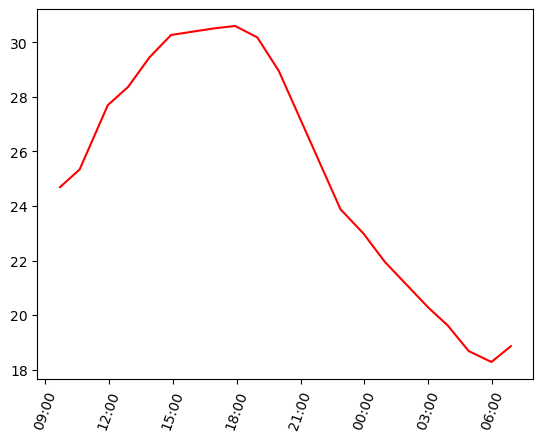

In [30]:
y1 = df_milano['temp']
df_milano['day'] = pd.to_datetime(df_milano['day']) 
x1 = df_milano['day']
fig, ax = plt.subplots()
plt.xticks(rotation=70)
hours = mdates.DateFormatter('%H:%M')
ax.xaxis.set_major_formatter(hours)
ax.plot(x1,y1,'r')


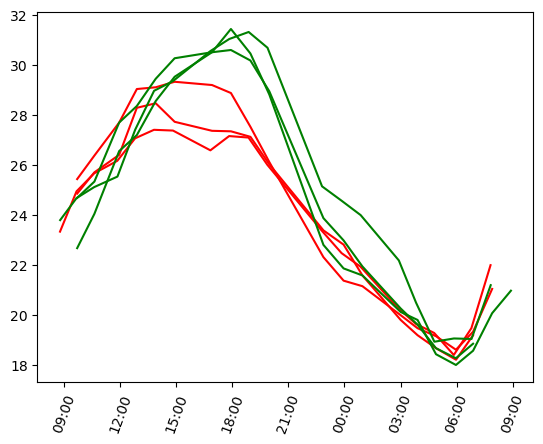

In [31]:
y1 = df_ravenna['temp']
df_ravenna['day'] = pd.to_datetime(df_ravenna['day']) 
x1 = df_ravenna['day']
y2 = df_faenza['temp']
df_faenza['day'] = pd.to_datetime(df_faenza['day']) 
x2 = df_faenza['day']
y3 = df_cesena['temp']
df_cesena['day'] = pd.to_datetime(df_cesena['day']) 
x3 = df_cesena['day']
y4 = df_milano['temp']
df_milano['day'] = pd.to_datetime(df_milano['day']) 
x4 = df_milano['day']
y5 = df_asti['temp']
df_asti['day'] = pd.to_datetime(df_asti['day']) 
x5 = df_asti['day']
y6 = df_torino['temp']
df_torino['day'] = pd.to_datetime(df_torino['day']) 
x6 = df_torino['day']
fig, ax = plt.subplots()
plt.xticks(rotation=70)
hours = mdates.DateFormatter('%H:%M')
ax.xaxis.set_major_formatter(hours)
plt.plot(x1,y1,'r',x2,y2,'r',x3,y3,'r')
plt.plot(x4,y4,'g',x5,y5,'g',x6,y6,'g')


In [32]:
dist = [df_ravenna['dist'][0],
     df_cesena['dist'][0],
     df_faenza['dist'][0],
     df_ferrara['dist'][0],
     df_bologna['dist'][0],
     df_mantova['dist'][0],
     df_piacenza['dist'][0],
     df_milano['dist'][0],
     df_asti['dist'][0],
     df_torino['dist'][0]
]


In [33]:
temp_max = [df_ravenna['temp'].max(),
     df_cesena['temp'].max(),
     df_faenza['temp'].max(),
     df_ferrara['temp'].max(),
     df_bologna['temp'].max(),
     df_mantova['temp'].max(),
     df_piacenza['temp'].max(),
     df_milano['temp'].max(),
     df_asti['temp'].max(),
     df_torino['temp'].max()
]
temp_min = [df_ravenna['temp'].min(),
     df_cesena['temp'].min(),
     df_faenza['temp'].min(),
     df_ferrara['temp'].min(),
     df_bologna['temp'].min(),
     df_mantova['temp'].min(),
     df_piacenza['temp'].min(),
     df_milano['temp'].min(),
     df_asti['temp'].min(),
     df_torino['temp'].min()
]


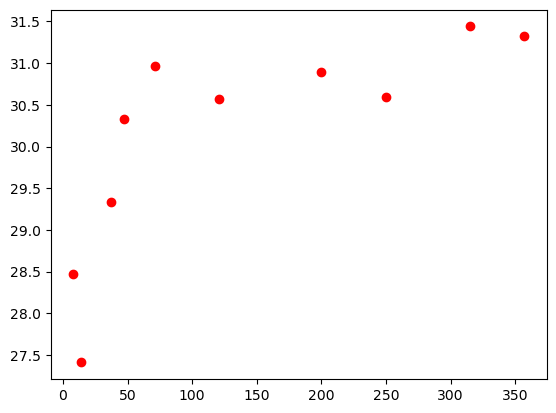

In [34]:
plt.plot(dist,temp_max,'ro')

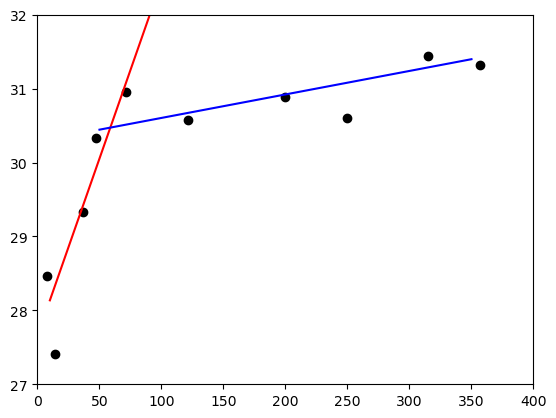

In [36]:
x = np.array(dist)
y = np.array(temp_max)
x1 = x[x<100]
x1 = x1.reshape((x1.size,1))
y1 = y[x<100]
x2 = x[x>50]
x2 = x2.reshape((x2.size,1))
y2 = y[x>50]
from sklearn.svm import SVR
svr_lin1 = SVR(kernel='linear', C=1e3)
svr_lin2 = SVR(kernel='linear', C=1e3)
svr_lin1.fit(x1, y1)
svr_lin2.fit(x2, y2)
xp1 = np.arange(10,100,10).reshape((9,1))
xp2 = np.arange(50,400,50).reshape((7,1))
yp1 = svr_lin1.predict(xp1)
yp2 = svr_lin2.predict(xp2)
plt.plot(xp1, yp1, c='r', label='Strong sea effect')
plt.plot(xp2, yp2, c='b', label='Light sea effect')
plt.axis((0,400,27,32))
plt.scatter(x, y, c='k', label='data')


In [37]:
print( svr_lin1.coef_)
print( svr_lin1.intercept_)
print( svr_lin2.coef_)
print( svr_lin2.intercept_)


[[0.04794118]]
[27.65617647]
[[0.00317797]]
[30.2854661]


[x,y] = [ 58 , 30 ]


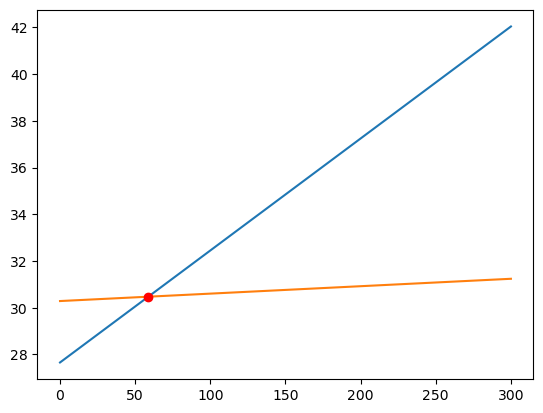

In [38]:
from scipy.optimize import fsolve
def line1(x):
    a1 = svr_lin1.coef_[0][0]
    b1 = svr_lin1.intercept_[0]
    return a1*x + b1
def line2(x):
    a2 = svr_lin2.coef_[0][0]
    b2 = svr_lin2.intercept_[0]
    return a2*x + b2
def findIntersection(fun1,fun2,x0):
 return fsolve(lambda x : fun1(x) - fun2(x),x0)
result = findIntersection(line1,line2,0.0)
print("[x,y] = [ %d , %d ]" % (result,line1(result)))
x = np.linspace(0,300,31)
plt.plot(x,line1(x),x,line2(x),result,line1(result),'ro')


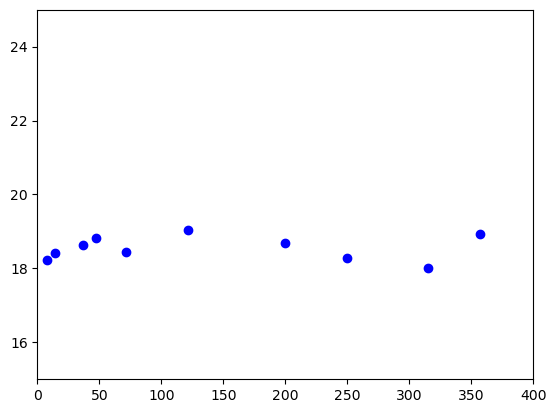

In [39]:
plt.axis((0,400,15,25))
plt.plot(dist,temp_min,'bo')


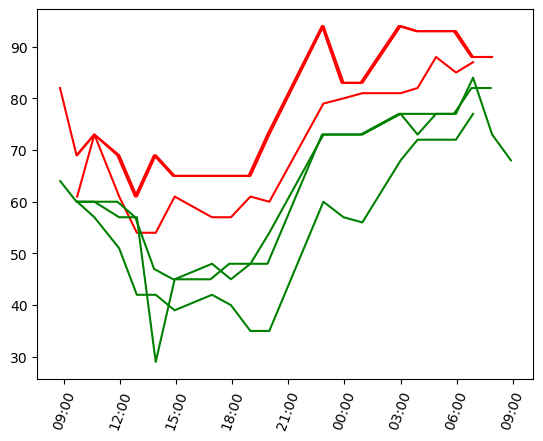

In [40]:
y1 = df_ravenna['humidity']
x1 = df_ravenna['day']
y2 = df_faenza['humidity']
x2 = df_faenza['day']
y3 = df_cesena['humidity']
x3 = df_cesena['day']
y4 = df_milano['humidity']
x4 = df_milano['day']
y5 = df_asti['humidity']
x5 = df_asti['day']
y6 = df_torino['humidity']
x6 = df_torino['day']
fig, ax = plt.subplots()
plt.xticks(rotation=70)
hours = mdates.DateFormatter('%H:%M')
ax.xaxis.set_major_formatter(hours)
plt.plot(x1,y1,'r',x2,y2,'r',x3,y3,'r')
plt.plot(x4,y4,'g',x5,y5,'g',x6,y6,'g')


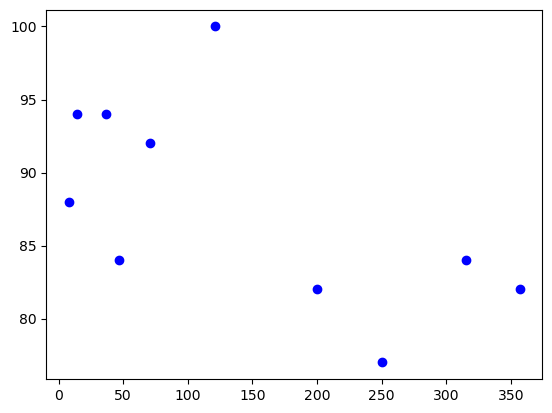

In [41]:
hum_max = [df_ravenna['humidity'].max(),
     df_cesena['humidity'].max(),
     df_faenza['humidity'].max(),
     df_ferrara['humidity'].max(),
     df_bologna['humidity'].max(),
     df_mantova['humidity'].max(),
     df_piacenza['humidity'].max(),
     df_milano['humidity'].max(),
     df_asti['humidity'].max(),
     df_torino['humidity'].max()
]
plt.plot(dist,hum_max,'bo')


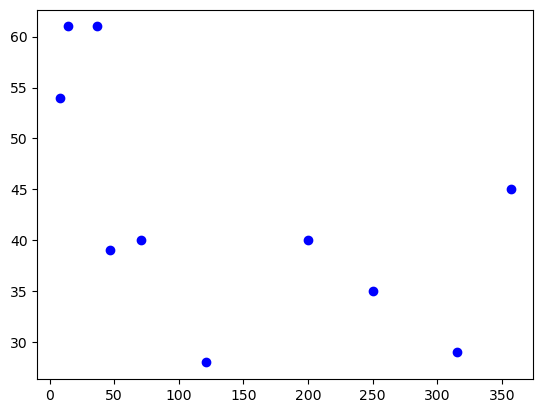

In [42]:
hum_min = [df_ravenna['humidity'].min(),
     df_cesena['humidity'].min(),
     df_faenza['humidity'].min(),
     df_ferrara['humidity'].min(),
     df_bologna['humidity'].min(),
     df_mantova['humidity'].min(),
     df_piacenza['humidity'].min(),
     df_milano['humidity'].min(),
     df_asti['humidity'].min(),
     df_torino['humidity'].min()
]
plt.plot(dist,hum_min,'bo')


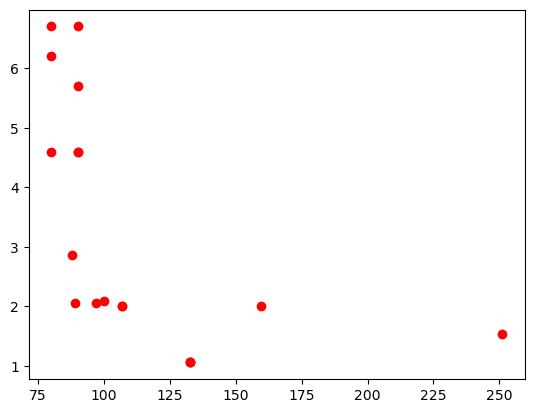

In [43]:
plt.plot(df_ravenna['wind_deg'],df_ravenna['wind_speed'],'ro')

In [44]:
hist, bins = np.histogram(df_ravenna['wind_deg'],8,[0,360])
print(hist)
print(bins)


[ 0  5 11  1  0  1  0  0]
[  0.  45.  90. 135. 180. 225. 270. 315. 360.]


In [45]:
def showRoseWind(values,city_name,max_value):
   N = 8
   theta = np.arange(0.,2 * np.pi, 2 * np.pi / N)
   radii = np.array(values)
   plt.axes([0.025, 0.025, 0.95, 0.95], polar=True)
   colors = [(1-x/max_value, 1-x/max_value, 0.75) for x in radii]
   plt.bar(theta +np.pi/8, radii, width=(2*np.pi/N), bottom=0.0, color=colors)
   plt.title(city_name,x=0.2, fontsize=20)


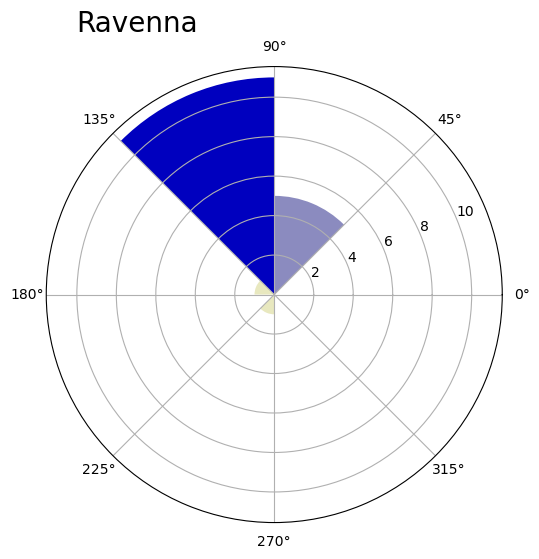

In [46]:
showRoseWind(hist,'Ravenna',max(hist))

[7 2 3 3 3 2 0 0]


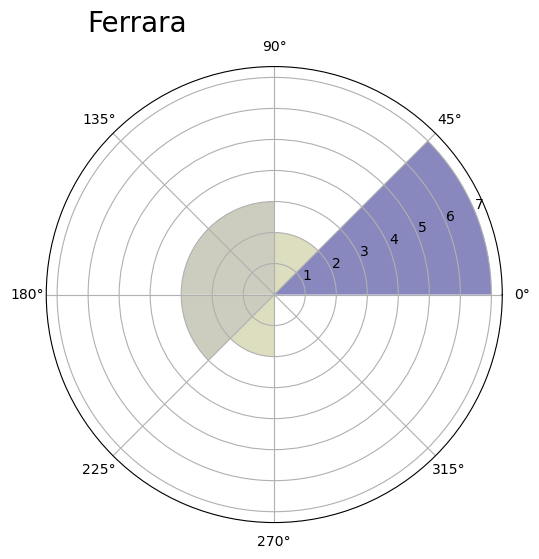

In [47]:
hist, bin = np.histogram(df_ferrara['wind_deg'],8,[0,360])
print(hist)
showRoseWind(hist,'Ferrara', 15.0)


In [48]:
def RoseWind_Speed(df_city):
   degs = np.arange(45,361,45)
   tmp =  []
   for deg in degs:
      tmp.append(df_city[(df_city['wind_deg']>(deg-46)) & (df_city['wind_deg']<deg)]['wind_speed'].mean())
   return np.nan_to_num(tmp)


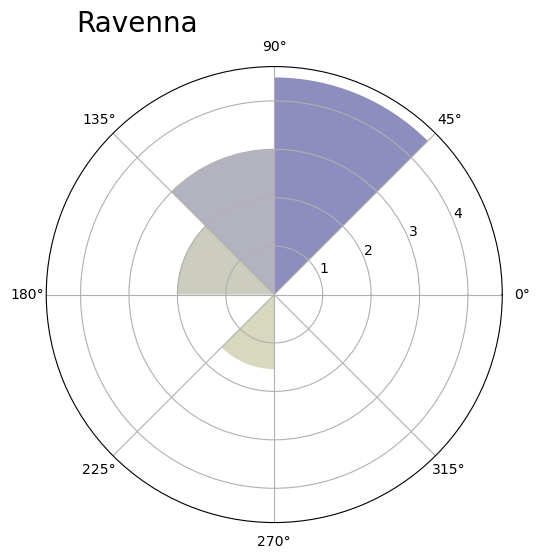

In [49]:
def showRoseWind_Speed(speeds,city_name):
    N = 8
    theta = np.arange(0,2 * np.pi, 2 * np.pi / N)
    radii = np.array(speeds)
    plt.axes([0.025, 0.025, 0.95, 0.95], polar=True)
    colors = [(1-x/10.0, 1-x/10.0, 0.75) for x in radii]
    bars = plt.bar(theta+np.pi/8, radii, width=(2*np.pi/N), bottom=0.0, color=colors)
    plt.title(city_name,x=0.2, fontsize=20)
showRoseWind_Speed(RoseWind_Speed(df_ravenna),'Ravenna')


In [50]:
df_ferrara.to_csv('ferrara.csv')
df_milano.to_csv('milano.csv')
df_mantova.to_csv('mantova.csv')
df_ravenna.to_csv('ravenna.csv')
df_torino.to_csv('torino.csv')
df_asti.to_csv('asti.csv')
df_bologna.to_csv('bologna.csv')
df_piacenza.to_csv('piacenza.csv')
df_cesena.to_csv('cesena.csv')
df_faenza.to_csv('faenza.csv')
